# `"boxplot_outlier"` Statistics

Computes outlier values on `"box-plot"` chart but can be used in alternative visualizations as well.

In [1]:
import pandas as pd
from lets_plot import *
from lets_plot.mapping import as_discrete


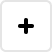
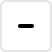
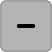
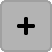
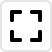
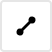
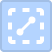
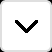
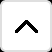
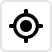
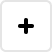
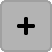
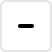
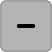
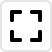
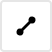
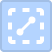
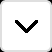
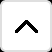
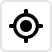

In [2]:
LetsPlot.setup_html()

In [3]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg.head(3)

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact

In [4]:
p = (ggplot(mpg, aes(y='hwy')) 
     + scale_color_viridis(option="magma", end=0.8) 
     + ggsize(700, 400))

In [5]:
# Ordering by variable "..middle.." when using stat "boxplot" or "boxplot_outlier".
class_by_middle=as_discrete('class', order_by='..middle..', order=1)

# Equivalent ordering by variable "..y.." when using `stat_summary()`.
class_by_y=as_discrete('class', order_by='..y..', order=1)


In [6]:
p + geom_boxplot(aes(x=class_by_middle, color='..middle..'))

#### 1. Show Just Outliers

Use `stat="boxplot_outlier"`.

In [7]:
outliers = geom_point(aes(x=class_by_middle, color='..middle..'), stat="boxplot_outlier")

p + outliers

#### 2. Add Ribbons and Mid-points

In [8]:
ribbon1 = geom_ribbon(aes(
                    x=class_by_middle, 
                    ymin="..ymin..",
                    ymax="..ymax.."), stat="boxplot")

ribbon2 = geom_ribbon(aes(
                    x=class_by_middle, 
                    ymin="..lower..",
                    ymax="..upper.."), stat="boxplot")

mid_points = stat_summary(aes(x=class_by_y, color="..y.."), 
                          fun="mq", 
                          geom="point", shape=15, size=6)

p + ribbon1 + ribbon2 + mid_points + outliers + labs(color="Middle")
